In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
%matplotlib inline

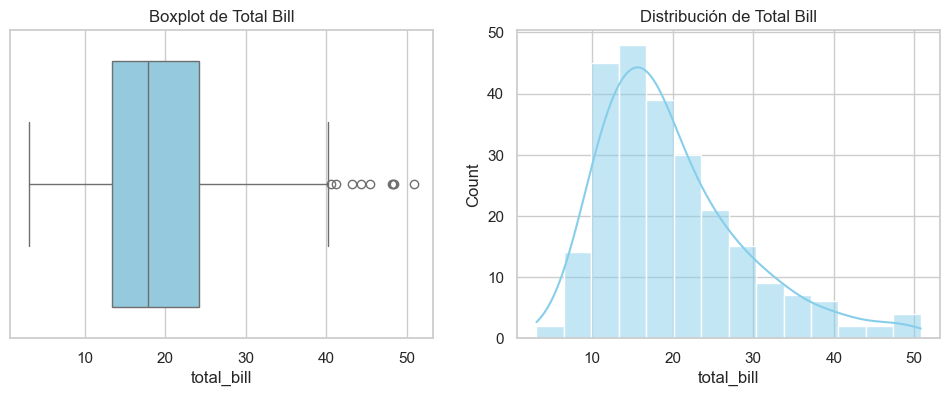

In [2]:
df_tips = sns.load_dataset('tips')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x=df_tips['total_bill'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de Total Bill')

sns.histplot(df_tips['total_bill'], kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribución de Total Bill')

plt.show()

In [3]:
Q1 = df_tips['total_bill'].quantile(0.25)
Q3 = df_tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_tips = df_tips[(df_tips['total_bill'] < lim_inf) | (df_tips['total_bill'] > lim_sup)]

print(f"Límite Superior: {lim_sup:.2f}")
print(f"Cantidad de outliers detectados: {len(outliers_tips)}")

Límite Superior: 40.30
Cantidad de outliers detectados: 9


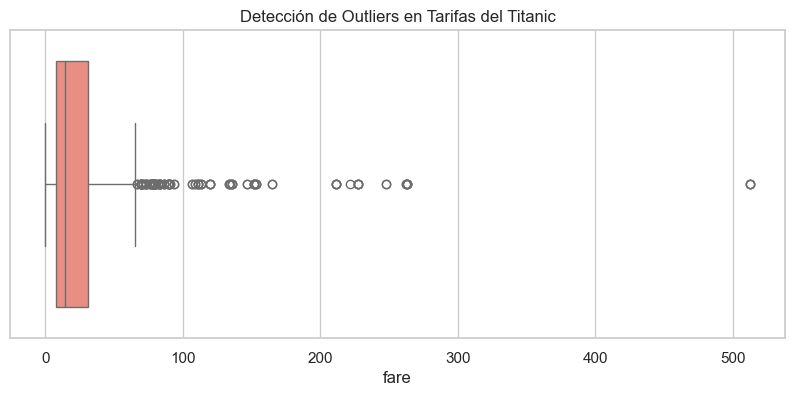

In [4]:
df_titanic = sns.load_dataset('titanic')

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_titanic['fare'], color='salmon')
plt.title('Detección de Outliers en Tarifas del Titanic')
plt.show()

In [5]:
Q1_t = df_titanic['fare'].quantile(0.25)
Q3_t = df_titanic['fare'].quantile(0.75)
IQR_t = Q3_t - Q1_t

sup_t = Q3_t + 1.5 * IQR_t

outliers_titanic = df_titanic[df_titanic['fare'] > sup_t]
porcentaje = (len(outliers_titanic) / len(df_titanic)) * 100

print(f"Límite superior: {sup_t:.2f}")
print(f"Outliers detectados: {len(outliers_titanic)} ({porcentaje:.2f}%)")

Límite superior: 65.63
Outliers detectados: 116 (13.02%)


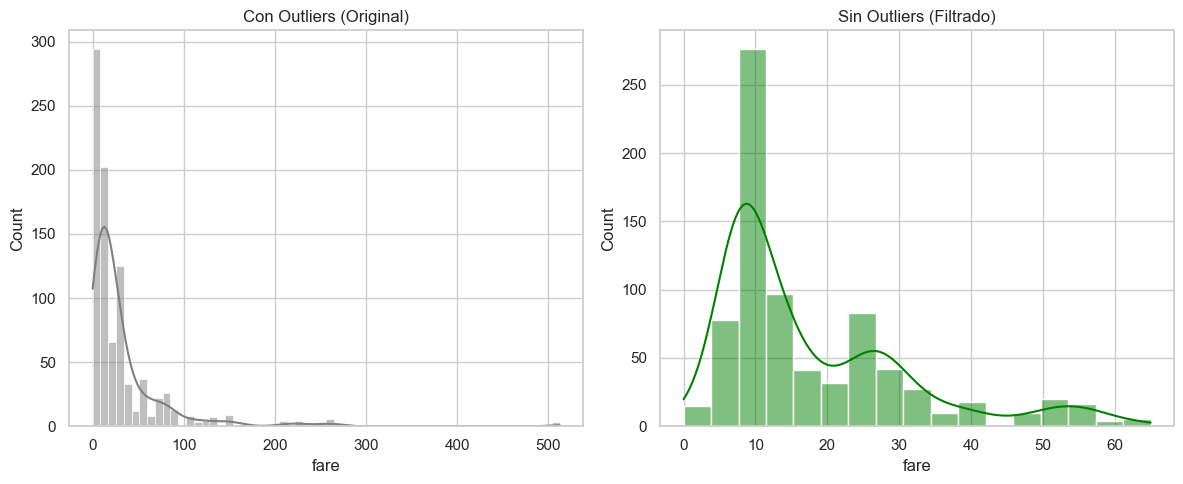

In [6]:
df_filtrado = df_titanic[df_titanic['fare'] <= sup_t]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_titanic['fare'], kde=True, ax=axes[0], color='gray')
axes[0].set_title('Con Outliers (Original)')

sns.histplot(df_filtrado['fare'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Sin Outliers (Filtrado)')

plt.tight_layout()
plt.show()